# Lab2-Kaggle

Student Information
Name: Didier Fernando Salazar Estrada

Student ID: 111065427 

GitHub ID: difersalest

Kaggle name: Didier Salazar


This notebook is for Lab2 Kaggle competition. For further information, see [kaggle_competition](https://www.kaggle.com/competitions/dm2022-isa5810-lab2-homework/overview).

Cited from `DM2022-Lab2-Master.ipynb`:

```{cite}
5. Other things you can try

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to. 
```

## 1. Data preparation

### 1.1 Load Data

In [18]:
import pandas as pd

In [19]:
### load csv data
data_id = pd.read_csv("../input/dm2022-isa5810-lab2-homework/data_identification.csv") #, index_col='tweet_id')
emotion = pd.read_csv("../input/dm2022-isa5810-lab2-homework/emotion.csv")#, index_col='tweet_id')

In [20]:
### load json data
tweets = pd.read_json("../input/dm2022-isa5810-lab2-homework/tweets_DM.json", lines=True)

In [5]:
print(data_id.shape)
data_id.head()

(1867535, 2)


,tweet_id,identification
0,0x28cc61,test
1,0x29e452,train
2,0x2b3819,train
3,0x2db41f,test
4,0x2a2acc,train


In [6]:
print(emotion.shape)
emotion.head()

(1455563, 2)


,tweet_id,emotion
0,0x3140b1,sadness
1,0x368b73,disgust
2,0x296183,anticipation
3,0x2bd6e1,joy
4,0x2ee1dd,anticipation


In [7]:
tweets.head()

,_score,_index,_source,_crawldate,_type
0,391,hashtag_tweets,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",2015-05-23 11:42:47,tweets
1,433,hashtag_tweets,"{'tweet': {'hashtags': ['freepress', 'TrumpLeg...",2016-01-28 04:52:09,tweets
2,232,hashtag_tweets,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",2017-12-25 04:39:20,tweets
3,376,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...",2016-01-24 23:53:05,tweets
4,989,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2de2...",2016-01-08 17:18:59,tweets


In [8]:
len(tweets['_source'])

1867535

In [9]:
tweets['_source'][0]['tweet']

{'hashtags': ['Snapchat'],
 'tweet_id': '0x376b20',
 'text': 'People who post "add me on #Snapchat" must be dehydrated. Cuz man.... that\'s <LH>'}

In [10]:
tweet_id = [tweets['_source'][i]['tweet']['tweet_id'] for i in range(len(tweets['_source']))]

In [11]:
tweet_text = [tweets['_source'][i]['tweet']['text'] for i in range(len(tweets['_source']))]

In [12]:
tweet = pd.DataFrame({'tweet_id': tweet_id, 'text': tweet_text})
# tweet = pd.DataFrame({'text' : tweet_text}, index=tweet_id)

In [13]:
print(tweet.shape)
tweet.head()

(1867535, 2)


,tweet_id,text
0,0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,0x28b412,"Confident of your obedience, I write to you, k..."
3,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,0x2de201,"""Trust is not the same as faith. A friend is s..."


In [14]:
### concatenate dfs to one df by tweet_id
df = data_id.merge(emotion, on='tweet_id', how='outer').merge(tweet, on='tweet_id', how='outer')
df.shape

(1867535, 4)

In [15]:
df.head()

,tweet_id,identification,emotion,text
0,0x28cc61,test,NaN,@Habbo I've seen two separate colours of the e...
1,0x29e452,train,joy,Huge Respect🖒 @JohnnyVegasReal talking about l...
2,0x2b3819,train,joy,Yoooo we hit all our monthly goals with the ne...
3,0x2db41f,test,NaN,@FoxNews @KellyannePolls No serious self respe...
4,0x2a2acc,train,trust,@KIDSNTS @PICU_BCH @uhbcomms @BWCHBoss Well do...


In [23]:
### train-test split
train_df = df[df['identification']=='train']
test_df = df[df['identification']=='test']

In [24]:
len(test_df.emotion) - sum(test_df.emotion.isnull())

0

emotion in test dataset is empty.

### 1.2 Save Data (to .pkl)

In [25]:
## save to pickle file
train_df.to_pickle("./train_df.pkl") 
test_df.to_pickle("./test_df.pkl")

In [26]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("./train_df.pkl")
test_df = pd.read_pickle("./test_df.pkl")

In [27]:
# train_df.drop(columns=['identification'], axis=1)
# test_df.drop(columns=['identification'], axis=1)

In [28]:
print(train_df.shape)
print(train_df)
print(test_df.shape)
print(test_df.shape[0]/(test_df.shape[0]+train_df.shape[0]))

(1455563, 4)
         tweet_id identification       emotion  \
1        0x29e452          train           joy   
2        0x2b3819          train           joy   
4        0x2a2acc          train         trust   
5        0x2a8830          train           joy   
6        0x20b21d          train  anticipation   
...           ...            ...           ...   
1867530  0x227e25          train       disgust   
1867531  0x293813          train       sadness   
1867532  0x1e1a7e          train           joy   
1867533  0x2156a5          train         trust   
1867534  0x2bb9d2          train         trust   

                                                      text  
1        Huge Respect🖒 @JohnnyVegasReal talking about l...  
2        Yoooo we hit all our monthly goals with the ne...  
4        @KIDSNTS @PICU_BCH @uhbcomms @BWCHBoss Well do...  
5        Come join @ambushman27 on #PUBG while he striv...  
6        @fanshixieen2014 Blessings!My #strength little...  
...                 

### 1.3 Exploratory data analysis (EDA)

In [ ]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

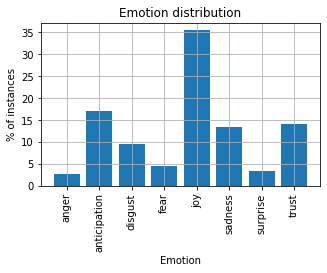

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.xticks(rotation=90)
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

### * prepare data, split train_df to training set and validation set

In [27]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [30]:
print('train.shape: ', train_df.shape)
print('test.shape: ', test_df.shape)

train.shape:  (1455563, 4)
test.shape:  (411972, 4)


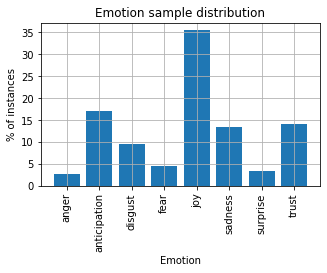

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df2 = train_df.groupby(['emotion']).count()['text']
df2 = df2.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df2.index,df2.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.xticks(rotation=90)
plt.title('Emotion sample distribution')
plt.grid(True)
plt.show()

In [27]:
#Utilizing RNN 
!pip install nlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 11.0 MB/s eta 0:00:0000:010:01


In [28]:
#Importing needed libraries 
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [31]:
#We can see the data to use in the training phase
train_df['text']

1245680    Hi @IAMCOREYB @B96Chicago please play <LH> by ...
1090392    Love is <LH> . It needs no #Rhyme or #Reason ....
594877     Ok deck tonight: The Cooping Theory. <LH> #thi...
1314454    I seldom post any status on my fb, but when I ...
1770687    @LarryJuneTFM definitely killed it at rollin l...
                                 ...                        
1300006    When we least expect it, and sometimes in the ...
1328435    @jeffsgiles @EnriqueMFlores3 @davidpsdem @GenJ...
1685904    @RDRentinfo I have now made this journey aroun...
821114     Hey LT Turner Jr thanks for the follow! <LH> <...
465626     Why is Alexa getting dummer since I bought her...
Name: text, Length: 1455563, dtype: object

In [32]:
#We use the built-in tensorflow tokenizer for 10,000 most frequent words in all the tweets
tokenizer = Tokenizer(num_words=10000, oov_token='')

tokenizer.fit_on_texts(train_df['text'])

print(tokenizer.texts_to_sequences([train_df['text'][10]]))

[[5, 98, 270, 46, 42, 671, 73, 11, 3, 154, 30, 154, 17, 1, 6670, 173, 2]]


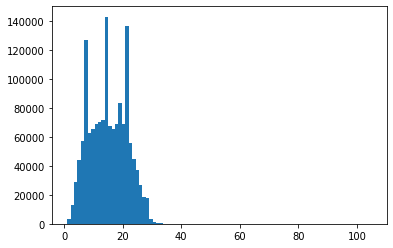

In [33]:
#Here we plot how many words have in average each tweet.
#The "x" value corresponds to the amount of words and the "y" value corresponds to the number of tweets
lengths = [len(t.split(' ')) for t in train_df['text']]
plt.hist(lengths, bins=len(set(lengths)))
plt.show()

In [34]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [35]:
#The model requires a fixed input size, so the tweets have to be padded and truncated.
#Following the previous graph we can see that almos all the tweets are below 50 words, so we can truncate it at that number. 
#Any tweet below that number will be padded with zero in the sequence.
def get_sequences(tokenizer, tweets):
    sequences = tokenizer.texts_to_sequences(tweets)
    padded_sequences = pad_sequences(sequences, truncating='post', maxlen=50, padding='post')
    return padded_sequences

In [36]:
padded_train_sequences = get_sequences(tokenizer, train_df['text'])

In [37]:
#Padded example for item 10 in the array
padded_train_sequences[10]

array([  92,  490, 1148,   70, 1581,  375,   11,    3,    1,  107, 1833,
       2771, 1258,  169,    1,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0], dtype=int32)

In [38]:
#Classes to train
classes = set(labels)
print(classes)

{'anticipation', 'joy', 'trust', 'fear', 'sadness', 'disgust', 'surprise', 'anger'}


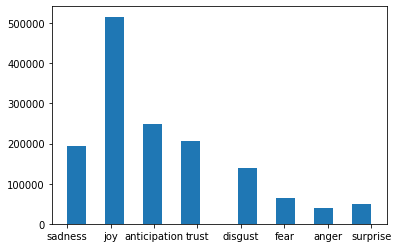

In [39]:
#We can see how many tweets corresponds to each emotion in the training set.
plt.hist(train_df['emotion'], bins=16)
plt.show()

In [40]:
#Here we assign an index to the classes for classification and viceversa.
classes_to_index = dict((c, i) for i, c in enumerate(classes))
index_to_classes = dict((v, k) for k, v in classes_to_index.items())

In [41]:
classes_to_index

{'anticipation': 0,
 'joy': 1,
 'trust': 2,
 'fear': 3,
 'sadness': 4,
 'disgust': 5,
 'surprise': 6,
 'anger': 7}

In [42]:
index_to_classes

{0: 'anticipation',
 1: 'joy',
 2: 'trust',
 3: 'fear',
 4: 'sadness',
 5: 'disgust',
 6: 'surprise',
 7: 'anger'}

In [43]:
print(len(test_df['emotion']))
print(len(test_df['text']))
print(labels)

411972
411972
['sadness' 'joy' 'anticipation' 'trust' 'disgust' 'fear' 'anger'
 'surprise']


In [44]:
#This is a function to obtain the ids of the classes given the label.
names_to_ids = lambda labels: np.array([classes_to_index.get(x) for x in labels])

In [45]:
#This is a function to obtain the names of the classes given the index (id).
ids_to_names = lambda index: np.array([index_to_classes.get(x) for x in index])

In [46]:
#Here we change all the emotions labels in the training data set to the corresponding id.
train_labels = names_to_ids(train_df['emotion'])
print(train_labels[1:10])

[1 0 1 2 5 0 2 2 2]


In [47]:
#Here we build our RNN model using LSTM in it to work in this large dataset,helping to remember better through the training.
#The dimensions are 10,000 for the most frequent used words in the data, 16 for the output for the next layer, input_length
# 50 corresponding to the padded and truncated lenght of each tweets.
#The LSTM are bidirectional, this means that run from the past to the future and viceversa, during training, this helps
#preserving the results from both past and future, they both have 20 cells which have their own input, output and memory.
#The final layer has 8 dimensions which corresponds to the eight emotions that we need to classify, it uses softmax
#so it will return a probability distribution between each emotion in a tweet.
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=50),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(8, activation='softmax')
])

#The loss is set in a way that works for multiclass classification problems, the adam optimizer works well for large datasets
#and we need to measure the accuracy for our training model.
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

2022-11-25 07:26:03.211274: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-25 07:26:03.212578: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-25 07:26:03.213930: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-25 07:26:03.214946: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-25 07:26:03.215952: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 16)            160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 50, 40)            5920      
_________________________________________________________________
bidirectional_1 (Bidirection (None, 40)                9760      
_________________________________________________________________
dense (Dense)                (None, 8)                 328       
Total params: 176,008
Trainable params: 176,008
Non-trainable params: 0
_________________________________________________________________


In [48]:
#We get the sequences for the testing set using the built-in tokenizer and we get the IDs for each emotion in the set.
test_sequences = get_sequences(tokenizer, test_df['text'])
test_labels = names_to_ids(test_df['emotion'])

In [49]:
#Although as we can see there is no emotions in the testing set to validate, so we can only try to predict and submit 
#to the competition to validate our results.
test_df['emotion']

1731376    NaN
617403     NaN
1732161    NaN
151098     NaN
297903     NaN
          ... 
18243      NaN
1866417    NaN
982844     NaN
1574092    NaN
564829     NaN
Name: emotion, Length: 411972, dtype: object

In [51]:
#We train our model with the training sets and we set the epochs to train (epochs=number of cycles through the training set)
h = model.fit(
    padded_train_sequences, train_labels,
    epochs=15,
)

2022-11-25 07:27:10.666277: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 291112600 exceeds 10% of free system memory.


Epoch 1/15
45487/45487 [==============================] - 626s 14ms/step - loss: 1.2452 - accuracy: 0.5518
Epoch 2/15
45487/45487 [==============================] - 616s 14ms/step - loss: 1.1500 - accuracy: 0.5846
Epoch 3/15
45487/45487 [==============================] - 619s 14ms/step - loss: 1.1172 - accuracy: 0.5966
Epoch 4/15
45487/45487 [==============================] - 620s 14ms/step - loss: 1.0986 - accuracy: 0.6035
Epoch 5/15
45487/45487 [==============================] - 617s 14ms/step - loss: 1.0864 - accuracy: 0.6082
Epoch 6/15
45487/45487 [==============================] - 616s 14ms/step - loss: 1.0779 - accuracy: 0.6113
Epoch 7/15
45487/45487 [==============================] - 616s 14ms/step - loss: 1.0709 - accuracy: 0.6139
Epoch 8/15
45487/45487 [==============================] - 613s 13ms/step - loss: 1.0652 - accuracy: 0.6162
Epoch 9/15
45487/45487 [==============================] - 615s 14ms/step - loss: 1.0603 - accuracy: 0.6179
Epoch 10/15
45487/45487 [============

In [52]:
len(test_labels)
print(test_labels)

[None None None ... None None None]


In [53]:
#We get the most probable emotion from each tweet predicted by our model using the test dataset.
preds = np.argmax(model.predict(test_sequences), axis=-1)
preds.shape, test_labels.shape

2022-11-25 10:00:51.073516: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 82394400 exceeds 10% of free system memory.


((411972,), (411972,))

In [54]:
#We convert our prediction to a pandas dataframe
answer = pd.DataFrame({'id': test_df['tweet_id'], 'emotion': ids_to_names(preds)})

In [55]:
#We convert our dataset into a csv file to submit to the competition
answer.to_csv('submission.csv', index=False) #submission.csv

In [56]:
#Shape of the submission file
pd.read_csv('./submission.csv').shape

(411972, 2)

## 2. Feature engineering

CouterVector, tfidfVector, W2V, PCA, LDA,FastText, Clustering

### 2.1 CounterVector

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
# nltk.download('punkt')

In [31]:
# build analyzers (bag-of-words)
BOW500_vectorizer = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
# apply analyzer to training data
BOW500_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features_500 = BOW500_vectorizer.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

# observe some feature names
BOW500_vectorizer.get_feature_names_out()[100:110]

/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


array(['can', 'car', 'care', 'change', 'christ', 'christmas', 'closed',
       'come', 'comes', 'coming'], dtype=object)

### 2.2 TFIDFVector

In [33]:
# import module
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
# build vectorizer (tfidf)
TFIDF500_vectorizer = TfidfVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
TFIDF500_vectorizer.fit(train_df['text'])

train_data_TFIDF_features_500 = TFIDF500_vectorizer.transform(train_df['text'])

## check features
TFIDF500_vectorizer.get_feature_names_out()[100:110]

array(['can', 'car', 'care', 'change', 'christ', 'christmas', 'closed',
       'come', 'comes', 'coming'], dtype=object)

### 2.3 PCA

In [ ]:
from sklearn.decomposition import PCA
BOW_PCA = PCA(n_components = 8).fit_transform(train_data_BOW_features_500.toarray())

In [ ]:
categories = list(train_df.groupby(['emotion']).groups.keys())

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
color = ['crimson', 'deepskyblue', 'limegreen', 'darkviolet', 'yellow', 'mediumblue', 'gold', 'greenyellow']

In [ ]:
# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = BOW_PCA[train_df['emotion'] == category].T[0]
    ys = BOW_PCA[train_df['emotion'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

it doesn't look right?

### 2.4 LDA

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
LDA = LatentDirichletAllocation(n_components=8, random_state=42)
BOW_LDA = LDA.fit_transform(train_data_BOW_features_500.toarray())

### 2.5 Word2Vect

In [ ]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

In [ ]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "../input/googlenews/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

### 2.6 Glove

In [ ]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

### 2.7 FastText

In [ ]:
from gensim.models import word2vec, fasttext


# Settings
seed = 666
sg = 0
window_size = 10
vector_size = 100
min_count = 1
workers = 8
epochs = 5
batch_words = 10000


# Train
# train_data = word2vec.LineSentence('wiki_text_seg.txt')
model = fasttext.FastText(
    train_data,
    min_count=min_count,
    size=vector_size,
    workers=workers,
    iter=epochs,
    window=window_size,
    sg=sg,
    seed=seed,
    batch_words=batch_words,
)


model.save('fasttext.model')

## 3. Model & Results Evaluation

In [ ]:
# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW500_vectorizer.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW500_vectorizer.transform(test_df['text'])
y_test = test_df['emotion']# all of this sould be nan

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

### 3.1 Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

In [ ]:
y_test_pred.shape

In [ ]:
test_df['tweet_id'].shape

In [ ]:
answer = pd.DataFrame({'id': test_df['tweet_id'], 'emotion': y_test_pred})

In [ ]:
answer.to_csv('submission.csv', index=False) #submission.csv

In [ ]:
pd.read_csv('./submission.csv').shape

In [ ]:
## dont know why the file didnt show
## so i try delete&rewrite
# import os
# os.remove("./submission.csv")

### 3.2 Naive Baysian

In [ ]:
# Answer here
from sklearn.naive_bayes import MultinomialNB

## build DecisionTree model
NB_model = MultinomialNB()
## training!
NB_model = NB_model.fit(X_train, y_train)

## predict!
y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

## 4. Deep learning & Result Evaluation

### 4.1 Prepare data (X,y)

In [ ]:
import keras

### 5.2 Prepare categorical label (y)

In [ ]:
## deal with label (string -> one-hot)
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils # keras==2.4.0 and tensorflow==2.3.0

In [ ]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return np_utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
# y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

### 5.3 Build model

In [ ]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

### 5.4 Train the model

In [ ]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('./training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

### 5.5 Predict on testset

In [ ]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

In [ ]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

In [ ]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("./training_log.csv")
training_log

## 6. High-dimension Visualization: t-SNE

### 6.1 Prepare visualizing target

In [ ]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

### 6.2 Plot using t-SNE (2-dimension)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

## Submission

In [ ]:
pd.read_csv('../input/dm2022-isa5810-lab2-homework/sampleSubmission.csv').shape